# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
!pip install sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'StudentID': [i+1 for i in range(10)], 'Age': [17,51,27,21,36,48,19,26,54,30],'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.set_index('StudentID',inplace=True)
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

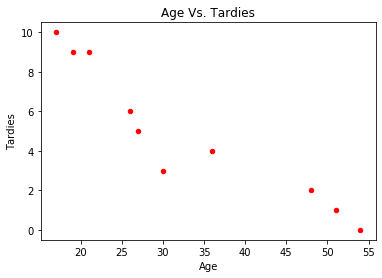

In [4]:
# Your code here.
#ploted with pyplot:
student_data.plot(kind='scatter',x='Age',y='Tardies',color='r',title='Age Vs. Tardies')
plt.show()

Text(0.5, 1.0, 'Age Vs. Tardies')

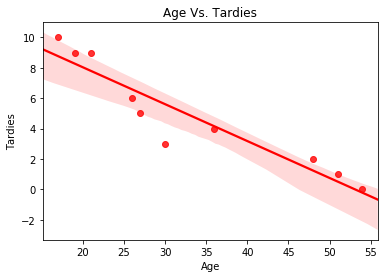

In [5]:
# With seaborn:
sns.regplot(x='Age',y='Tardies',data=student_data,color='r').set_title('Age Vs. Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [6]:
# Your response here. 
'''Descendent trend observed: The elder the student is the lower number of tardies has'''

'Descendent trend observed: The elder the student is the lower number of tardies has'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.

#Covariation:

student_data['Age'].cov(student_data['Tardies'])

-45.56666666666666

In [8]:
# Your response here.

#Coef. of Correlation:
student_data['Age'].corr(student_data['Tardies'])

-0.9391626886887122

In [9]:
#Correlation Analisys (table):
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [10]:
# Covariance matrxi:
x = student_data['Age'].to_numpy()
y = student_data['Tardies'].to_numpy()

X = np.stack((x,y),axis=0)
  
print("shape of matrix x and y:", np.shape(X)) 
print("shape of covariance matrix:", np.shape(np.cov(X))) 
print(np.cov(X)) 

shape of matrix x and y: (2, 10)
shape of covariance matrix: (2, 2)
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


In [11]:
print('A variance-covariance matrix: is a square matrix that contains the variances and covariances associated with different variables. The elements of the diagonal of the matrix contain the variances of the variables, while the elements that are outside the diagonal contain the covariances between all possible pairs of variables.\n\nVariance is the expectation of the squared deviation of a random variable from its mean. Informally, it measures how far a set of (random) numbers are spread out from their average value.\n\nThe correlation indicates the strength and direction of a linear relationship and proportionality between two statistical variables. Two quantitative variables are considered to be correlated when the values of one of them vary systematically with respect to the homonymous values of the other.\n\n Both covarianze and correlation observed values indicates an inverse relationship.')

A variance-covariance matrix: is a square matrix that contains the variances and covariances associated with different variables. The elements of the diagonal of the matrix contain the variances of the variables, while the elements that are outside the diagonal contain the covariances between all possible pairs of variables.

Variance is the expectation of the squared deviation of a random variable from its mean. Informally, it measures how far a set of (random) numbers are spread out from their average value.

The correlation indicates the strength and direction of a linear relationship and proportionality between two statistical variables. Two quantitative variables are considered to be correlated when the values of one of them vary systematically with respect to the homonymous values of the other.

 Both covarianze and correlation observed values indicates an inverse relationship.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.

'''With this regression model we will have as outcome the variable y = student_data['Tardies'].values'''

x = student_data[['Age']].values
y = student_data['Tardies'].values

reg = LinearRegression().fit(x, y)


print(f'The slope is: {reg.coef_[0]}')
print(f'The intercept is: {reg.intercept_}')
print(f'The coefficient of determination (r²) is: {reg.score(x, y)}')

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768
The coefficient of determination (r²) is: 0.8820265558250109


Plot your regression model on your scatter plot.

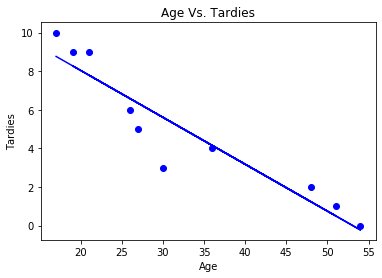

In [13]:
# Your code here.

#Ploted with plotly:
plt.scatter(x, y, color='b')
plt.plot(x, reg.predict(x), color='b')
plt.title('Age Vs. Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Text(0.5, 1.0, 'Age Vs. Tardies')

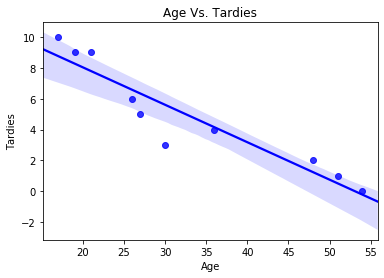

In [14]:
# Ploted with seaborn:
sns.regplot(x='Age',y='Tardies',data=student_data,color='blue').set_title('Age Vs. Tardies')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [15]:
print('With a coefficient of determination (r²) of 0.88, we can consider our model a moderate-good predictor. Specially because this model does not take into account many other contributor factors.')

With a coefficient of determination (r²) of 0.88, we can consider our model a moderate-good predictor. Specially because this model does not take into account many other contributor factors.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [16]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


In [17]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
Make                       35952 non-null object
Model                      35952 non-null object
Year                       35952 non-null int64
Engine Displacement        35952 non-null float64
Cylinders                  35952 non-null float64
Transmission               35952 non-null object
Drivetrain                 35952 non-null object
Vehicle Class              35952 non-null object
Fuel Type                  35952 non-null object
Fuel Barrels/Year          35952 non-null float64
City MPG                   35952 non-null int64
Highway MPG                35952 non-null int64
Combined MPG               35952 non-null int64
CO2 Emission Grams/Mile    35952 non-null float64
Fuel Cost/Year             35952 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 4.1+ MB


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [18]:
# Your response here. 
vehicles_filtered = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
vehicles_filtered.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [19]:
# Which variable do you think will be the most important in determining CO2 emissions? 
print('The major impact over CO2 Emission is "Fuel Barrels/Year" with a 0.986 of correlation (98,6%)')

#Which provides the least amount of helpful information for determining CO2 emissions? 
print('The minor impact over CO2 Emission is "Year" with a -0.222 of correlation (-22,2%)')


The major impact over CO2 Emission is "Fuel Barrels/Year" with a 0.986 of correlation (98,6%)
The minor impact over CO2 Emission is "Year" with a -0.222 of correlation (-22,2%)


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Your response here. 

print('With this regression model we will have as outcome the variable y = CO2 Emission Grams/Mile')

x = vehicles[['Fuel Barrels/Year']].values
y = vehicles['CO2 Emission Grams/Mile'].values

reg = LinearRegression().fit(x, y)

print('The type of regression used is LINEAR')


With this regression model we will have as outcome the variable y = CO2 Emission Grams/Mile
The type of regression used is LINEAR


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Your response here. 
print(f'The slope is: {reg.coef_[0]}')
print(f'The intercept is: {reg.intercept_}')
print(f'The coefficient of determination (r²) is: {reg.score(x, y)}')

The slope is: 26.283625397470086
The intercept is: 12.486520830760355
The coefficient of determination (r²) is: 0.9725680773391495


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [22]:
# Your code here. 
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]
invited = pd.DataFrame(list(zip(X,Y)),columns = ['invited','attendant'])
invited

,invited,attendant
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

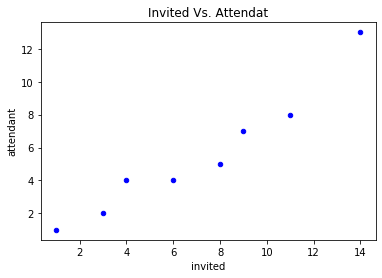

In [23]:
# Your code here.
invited.plot(kind='scatter',x='invited',y='attendant',color='b',title='Invited Vs. Attendat')
plt.show()

In [24]:
print('With this regression model we will have as outcome the variable y = attendat')

x = invited[['invited']].values
y = invited['attendant'].values

reg = LinearRegression().fit(x, y)

print('The type of regression used is LINEAR')

With this regression model we will have as outcome the variable y = attendat
The type of regression used is LINEAR


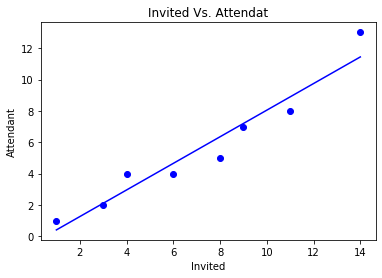

In [25]:
plt.scatter(x, y, color='b')
plt.plot(x, reg.predict(x), color='b')
plt.title('Invited Vs. Attendat')
plt.xlabel('Invited')
plt.ylabel('Attendant')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [26]:
# Your response here. 
print('There is a linear relationship between both variables, but does not fullfil the linearity for the highest value observed')
print(f'The slope is: {reg.coef_[0]}')
print(f'The intercept is: {reg.intercept_}')
print(f'The coefficient of determination (r²) is: {reg.score(x, y)}')

There is a linear relationship between both variables, but does not fullfil the linearity for the highest value observed
The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945
The coefficient of determination (r²) is: 0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [27]:
# Your response here. 
print('There is a linear relationship between both variables, but does not fullfil the linearity for the highest value observed.')
print('So that, I consider that the outlier is x=14, therefore I\'ll drop it from the dataset.')
invited_correction = invited.drop([7])

There is a linear relationship between both variables, but does not fullfil the linearity for the highest value observed.
So that, I consider that the outlier is x=14, therefore I'll drop it from the dataset.


In [28]:
invited_correction

,invited,attendant
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [29]:
print('With this regression model we will have as outcome the variable y = attendat')

x_ = invited_correction[['invited']].values
y_ = invited_correction['attendant'].values

reg_ = LinearRegression().fit(x_, y_)

print('The type of regression used is LINEAR')
print(f'The slope is: {reg_.coef_[0]}')
print(f'The intercept is: {reg_.intercept_}')
print(f'The coefficient of determination (r²) is: {reg_.score(x_, y_)}')

With this regression model we will have as outcome the variable y = attendat
The type of regression used is LINEAR
The slope is: 0.6842105263157896
The intercept is: 0.32330827067669077
The coefficient of determination (r²) is: 0.9433811802232853


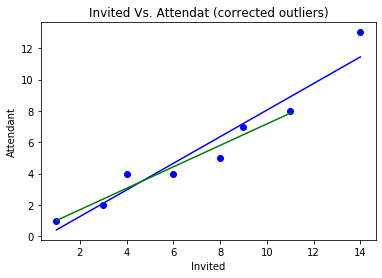

In [30]:
plt.scatter(x, y, color='b')
plt.plot(x, reg.predict(x), color='b')
plt.plot(x_, reg_.predict(x_), color='g')
plt.title('Invited Vs. Attendat (corrected outliers)')
plt.xlabel('Invited')
plt.ylabel('Attendant')
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [31]:
# Your response here. 
print('Finally, with outliers correction done, we get a higher r², which indicates a better fit of the scatter to the calculated function. \nBlue line -> Not corrected outliers \nGreen line -> Corrected outliers. \nIn general terms, the correction will improve our predictions in the range corrected.')


Finally, with outliers correction done, we get a higher r², which indicates a better fit of the scatter to the calculated function. 
Blue line -> Not corrected outliers 
Green line -> Corrected outliers. 
In general terms, the correction will improve our predictions in the range corrected.
